In [86]:
import numpy as np
import pandas as pd
import random
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from tabulate import tabulate
import matplotlib

In [2]:
sku_df = pd.read_csv('data/final_df.nosync.csv')
sku_df.head()

,sku_7915,sku_9633,sku_10896,sku_19633,sku_29633,sku_39633,sku_59633,sku_69633,sku_98327,sku_106343,...,sku_9867297,sku_9880895,sku_9888506,sku_9911900,sku_9919950,sku_9957390,sku_9978362,sku_9992306,sku_9999170,sku_9999950
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


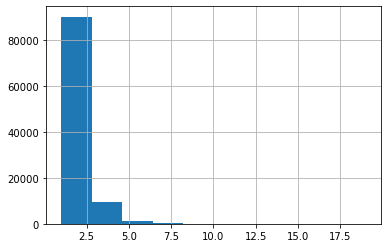

In [56]:
sku_df.sum(axis=1).hist()

In [57]:
sku_df.sum(axis=1).describe()

count    101339.000000
mean          1.514254
std           0.942746
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          19.000000
dtype: float64

In [3]:
assoc_df = sku_df[sku_df.sum(axis=1) > 1]

In [97]:
sku_cols = ['sku', 'dept', 'classid', 'upc', 'style', 'color', 'size', 'packsize', 'vendor', 'brand']
skuinfo = pd.read_csv('data/skuinfo.csv', names=sku_cols, usecols=range(10))
skuinfo = skuinfo.filter(['sku', 'color', 'packsize', 'brand'])
skuinfo.head()

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,sku,color,packsize,brand
0,3,WHISPERWHITE,1,TURNBURY
1,4,SPEARMI,1,C A SPOR
2,5,34 SILVER,1,BEAU IDE
3,8,MORNING MI,1,HARTSTRI
4,15,255CAMEL,1,JONES/LA


In [5]:
assoc_df.shape

(34136, 550)

In [6]:
sku_df.shape

(101339, 550)

## Top 10 Products

In [7]:
# 10 commonly purchased items
top10 = sku_df.mean().sort_values(ascending=False)[0:10,]

In [114]:
top10_df = pd.DataFrame(top10, columns=['pct'])
top10_df['sku'] = [int(i[4:]) for i in top10_df.index]
top10_df.head()

,pct,sku
sku_4628597,0.061427,4628597
sku_4108011,0.026762,4108011
sku_3524026,0.024837,3524026
sku_2698353,0.020160,2698353
sku_5528349,0.018936,5528349


In [115]:
top10_df = top10_df.set_index('sku').join(skuinfo.set_index('sku'), how='left')
top10_df

,pct,color,packsize,brand
sku,,,,
4628597,0.061427,ORANGE GWP,36,CLINIQUE
4108011,0.026762,DDML,6,CLINIQUE
3524026,0.024837,DDML PUMP,6,CLINIQUE
2698353,0.020160,02NEUTRAL,3,CLINIQUE
5528349,0.018936,01-BLACK,3,LANCOME
3978011,0.018009,CLARIFY,3,CLINIQUE
4208011,0.017506,03TRANS 3,3,CLINIQUE
2783996,0.015177,01-BLACK,3,LANCOME
3968011,0.014624,CLARIFY,3,CLINIQUE


In [116]:
str_cols = ['store', 'city', 'state', 'zip']
strinfo = pd.read_csv('data/strinfo.csv', sep=',', names=str_cols, usecols=range(0,4))

In [103]:
skst_cols = ['sku','store', 'cost', 'retail']
skstinfo = pd.read_csv('data/skstinfo.nosync.csv', names=skst_cols, usecols=range(0,4))

In [104]:
random.seed(308)
store_samp = random.sample(strinfo.store.tolist(), 5)
print(store_samp)

[1704, 1203, 3807, 3404, 3602]


In [105]:
skstinfo = skstinfo[skstinfo.store.isin(store_samp)]
skstinfo.shape

(360740, 4)

In [106]:
# calculating margin by taking average cost and retail price by sku in the sampled store
sku_pricing = skstinfo.drop('store', axis=1).groupby(['sku']).mean()
sku_pricing['profit'] = sku_pricing.retail - sku_pricing.cost
sku_pricing['margin'] = sku_pricing.profit/sku_pricing.retail

In [117]:
top10_df = top10_df.join(sku_pricing, how = 'left')
top10_df

,pct,color,packsize,brand,cost,retail,profit,margin
sku,,,,,,,,
4628597,0.061427,ORANGE GWP,36,CLINIQUE,0.0,0.0,0.0,NaN
4108011,0.026762,DDML,6,CLINIQUE,NaN,NaN,NaN,NaN
3524026,0.024837,DDML PUMP,6,CLINIQUE,13.8,23.0,9.2,0.4
2698353,0.020160,02NEUTRAL,3,CLINIQUE,10.5,17.5,7.0,0.4
5528349,0.018936,01-BLACK,3,LANCOME,13.2,22.0,8.8,0.4
3978011,0.018009,CLARIFY,3,CLINIQUE,11.4,19.0,7.6,0.4
4208011,0.017506,03TRANS 3,3,CLINIQUE,NaN,NaN,NaN,NaN
2783996,0.015177,01-BLACK,3,LANCOME,NaN,NaN,NaN,NaN
3968011,0.014624,CLARIFY,3,CLINIQUE,6.6,11.0,4.4,0.4


In [28]:
print(top10_df.filter(['pct', 'brand', 'cost', 'retail', 'margin']))

              pct      brand  cost  retail  margin
sku                                               
4628597  0.061427  CLINIQUE    0.0     0.0     0.0
4108011  0.026762  CLINIQUE    NaN     NaN     NaN
3524026  0.024837  CLINIQUE   13.8    23.0     9.2
2698353  0.020160  CLINIQUE   10.5    17.5     7.0
5528349  0.018936  LANCOME    13.2    22.0     8.8
3978011  0.018009  CLINIQUE   11.4    19.0     7.6
4208011  0.017506  CLINIQUE    NaN     NaN     NaN
2783996  0.015177  LANCOME     NaN     NaN     NaN
3968011  0.014624  CLINIQUE    6.6    11.0     4.4
3161221  0.014496  CLINIQUE    8.1    13.5     5.4


## Association Rules

In [16]:
# will be using assoc df for this

In [17]:
freqItems = apriori(assoc_df, min_support=0.001, use_colnames=True)

In [19]:
assoc_rules = association_rules(freqItems, metric="lift", min_threshold=1)

In [26]:
assoc_rules.sort_values(by='lift', ascending=False).head(30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
245,(sku_9600684),(sku_9469364),0.001084,0.001113,0.001025,0.945946,849.758179,0.001024,18.479406
244,(sku_9469364),(sku_9600684),0.001113,0.001084,0.001025,0.921053,849.758179,0.001024,12.652937
231,(sku_6972521),(sku_7232521),0.001318,0.001377,0.001230,0.933333,677.878014,0.001229,14.979347
230,(sku_7232521),(sku_6972521),0.001377,0.001318,0.001230,0.893617,677.878014,0.001229,9.387608
205,(sku_7039904),(sku_5329905),0.001582,0.001406,0.001201,0.759259,539.959877,0.001199,4.148005
204,(sku_5329905),(sku_7039904),0.001406,0.001582,0.001201,0.854167,539.959877,0.001199,6.846295
196,(sku_5109905),(sku_5749904),0.001494,0.001465,0.001172,0.784314,535.466667,0.001170,4.629573
197,(sku_5749904),(sku_5109905),0.001465,0.001494,0.001172,0.800000,535.466667,0.001170,4.992530
199,(sku_5129905),(sku_6939904),0.001494,0.001611,0.001142,0.764706,474.618182,0.001140,4.243152
198,(sku_6939904),(sku_5129905),0.001611,0.001494,0.001142,0.709091,474.618182,0.001140,3.432364


In [50]:
assoc_rules.describe()

,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.027497,0.027497,0.002247,0.268485,73.791217,0.001686,1.946377
std,0.040947,0.040947,0.001623,0.265319,149.807086,0.001432,2.155958
min,0.001084,0.001084,0.001025,0.006535,1.027970,0.000067,1.000434
25%,0.004738,0.004738,0.001260,0.072924,2.380474,0.000811,1.044807
50%,0.013300,0.013300,0.001655,0.162087,9.341286,0.001256,1.139074
75%,0.028767,0.028767,0.002607,0.350943,41.966773,0.002294,1.513464
max,0.156902,0.156902,0.012421,0.945946,849.758179,0.011472,18.479406


In [ ]:
# things to note, on average support is quite low
# confidence also pretty low for many combos
# some lifts can be very high

# Results Exploration

In [70]:
skuinfo.shape

(1564178, 10)

In [107]:
sku_margins = pd.DataFrame([int(i[4:]) for i in sku_df.columns], 
                           columns=['sku']).set_index('sku').join(
    sku_pricing, how='left')
sku_margins.head()

,cost,retail,profit,margin
sku,,,,
7915,11.7,19.5,7.8,0.4
9633,13.5,22.5,9.0,0.4
10896,11.1,18.5,7.4,0.4
19633,13.5,22.5,9.0,0.4
29633,13.5,22.5,9.0,0.4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1657f2210>,
      dtype=object)

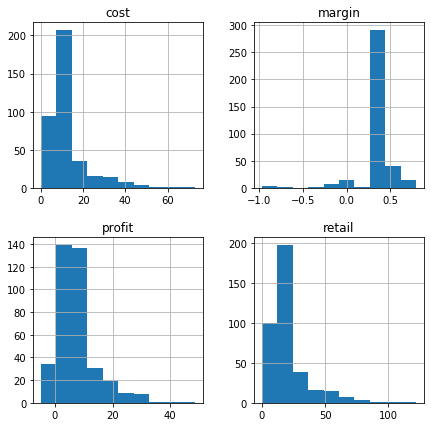

In [108]:
sku_margins.hist(figsize=(7,7))

In [109]:
sku_margins.describe()

,cost,retail,profit,margin
count,380.000000,380.000000,380.000000,375.000000
mean,11.884263,19.967167,8.082904,0.383668
std,9.874801,16.509907,6.859228,0.202827
min,0.000000,0.000000,-4.860000,-0.972000
25%,7.500000,11.500000,4.902500,0.400000
50%,10.500000,17.500000,7.000000,0.400000
75%,13.500000,22.500000,9.000000,0.400000
max,73.200000,122.000000,48.800000,0.800000


In [101]:
print(sku_margins[sku_margins.margin < 0].join(skuinfo.set_index('sku'), how='left'))
print(sku_margins[sku_margins.margin < 0].join(skuinfo.set_index('sku'), how='left').shape)


         cost    retail    margin         color packsize      brand
sku                                                                
98327    2.12  1.500000 -0.620000  BLUE                1  SUMMER S 
518363   2.37  1.996667 -0.373333  BLUE                1  SUMMER S 
3348362  1.76  1.663333 -0.096667  CLEAR               1  SUMMER S 
4318362  1.76  1.663333 -0.096667  BLUE                1  SUMMER S 
4898362  1.76  1.663333 -0.096667  RED                 1  SUMMER S 
5168362  1.76  1.663333 -0.096667  YELLOW              1  SUMMER S 
5278362  2.10  1.830000 -0.270000  CLEAR               1  SUMMER S 
5938362  2.10  1.830000 -0.270000  BLUE                1  SUMMER S 
6208362  2.10  1.830000 -0.270000  GREEN               1  SUMMER S 
6366398  2.00  1.990000 -0.010000  MULTI               1  MAIN ING 
6656135  3.36  2.000000 -1.360000  001BLACK            1  HUE/KAYS 
6738362  2.10  1.830000 -0.270000  RED                 1  SUMMER S 
6998362  2.10  1.830000 -0.270000  YELLOW       

In [113]:
sku_margins[sku_margins.margin > 0.7].join(skuinfo.set_index('sku'), how='left')

,cost,retail,profit,margin,color,packsize,brand
sku,,,,,,,
7408278,7.9,39.5,31.6,0.8,BLACK,3,MURANO N


In [147]:
assoc_rules.sort_values(by='lift', ascending=False).head(40)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
245,(sku_9600684),(sku_9469364),0.001084,0.001113,0.001025,0.945946,849.758179,0.001024,18.479406
244,(sku_9469364),(sku_9600684),0.001113,0.001084,0.001025,0.921053,849.758179,0.001024,12.652937
231,(sku_6972521),(sku_7232521),0.001318,0.001377,0.001230,0.933333,677.878014,0.001229,14.979347
230,(sku_7232521),(sku_6972521),0.001377,0.001318,0.001230,0.893617,677.878014,0.001229,9.387608
205,(sku_7039904),(sku_5329905),0.001582,0.001406,0.001201,0.759259,539.959877,0.001199,4.148005
204,(sku_5329905),(sku_7039904),0.001406,0.001582,0.001201,0.854167,539.959877,0.001199,6.846295
196,(sku_5109905),(sku_5749904),0.001494,0.001465,0.001172,0.784314,535.466667,0.001170,4.629573
197,(sku_5749904),(sku_5109905),0.001465,0.001494,0.001172,0.800000,535.466667,0.001170,4.992530
199,(sku_5129905),(sku_6939904),0.001494,0.001611,0.001142,0.764706,474.618182,0.001140,4.243152
198,(sku_6939904),(sku_5129905),0.001611,0.001494,0.001142,0.709091,474.618182,0.001140,3.432364


In [121]:
sku_margins=sku_margins.join(skuinfo.set_index('sku'), how='left')

In [123]:
sku_margins[sku_margins.index.isin([9600684, 9469364])]

,cost,retail,profit,margin,color,packsize,brand
sku,,,,,,,
9469364,3.0,7.0,4.0,0.571429,LIGHT BEIG,1,CABERNET
9600684,NaN,NaN,NaN,NaN,WHITE,1,CABERNET


In [148]:
sku_margins[sku_margins.index.isin([6972521, 7232521])]

,cost,retail,profit,margin,color,packsize,brand
sku,,,,,,,
6972521,7.65,13.0,5.35,0.411538,WHITE,6,NOBLE EX
7232521,1.90,5.0,3.10,0.620000,WHITE,6,NOBLE EX


In [149]:
sku_margins[sku_margins.index.isin([7039904, 5329905])]

,cost,retail,profit,margin,color,packsize,brand
sku,,,,,,,
5329905,1.6,4.0,2.4,0.6,BEIGE,3,MILCO IN
7039904,1.6,4.0,2.4,0.6,WHITE,3,MILCO IN


In [151]:
sku_margins[sku_margins.index.isin([6752521, 6642521, 6742521])]

,cost,retail,profit,margin,color,packsize,brand
sku,,,,,,,
6642521,7.65,13.0,5.35,0.411538,SAGE,6,NOBLE EX
6742521,NaN,NaN,NaN,NaN,SAGE,6,NOBLE EX
6752521,NaN,NaN,NaN,NaN,SAGE,6,NOBLE EX


In [152]:
sku_margins[sku_margins.index.isin([6072521, 6032521, 6062521])]

,cost,retail,profit,margin,color,packsize,brand
sku,,,,,,,
6032521,NaN,NaN,NaN,NaN,LINEN,6,NOBLE EX
6062521,NaN,NaN,NaN,NaN,LINEN,6,NOBLE EX
6072521,NaN,NaN,NaN,NaN,LINEN,6,NOBLE EX


In [133]:
pd.set_option('display.max_rows', 100)
assoc_rules.sort_values(by='lift', ascending=False).filter(['antecedents', 'consequents']).iloc[0:100,]

,antecedents,consequents
245,(sku_9600684),(sku_9469364)
244,(sku_9469364),(sku_9600684)
231,(sku_6972521),(sku_7232521)
230,(sku_7232521),(sku_6972521)
205,(sku_7039904),(sku_5329905)
204,(sku_5329905),(sku_7039904)
196,(sku_5109905),(sku_5749904)
197,(sku_5749904),(sku_5109905)
199,(sku_5129905),(sku_6939904)
198,(sku_6939904),(sku_5129905)


In [137]:
top_100_lst = []
consequents_antecedents = assoc_rules.sort_values(by='lift', ascending=False).filter(['antecedents', 'consequents'])
for i in range(100):
    if i % 2 == 1:
        lst_item = consequents_antecedents.iloc[i,]
        top_100_lst.append(lst_item)

top100_candidates = pd.DataFrame(top_100_lst)

In [143]:
for col in top100_candidates.columns:
    top100_candidates[col] = [list(i) for i in top100_candidates[col]]

In [146]:
top100_candidates.to_csv('top100_candidates.csv')